<a href="https://colab.research.google.com/github/Molzard/PCVK-Ganjil-2025/blob/main/Week5_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---


<p align="center">D1. Percobaan Histogram</p>


---



In [ ]:
import numpy as np
import cv as cv
from google.colab.patches import cv_imshow
from skimage import io
import os
import math
import matplotlib.pyplot as plt
import glob

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


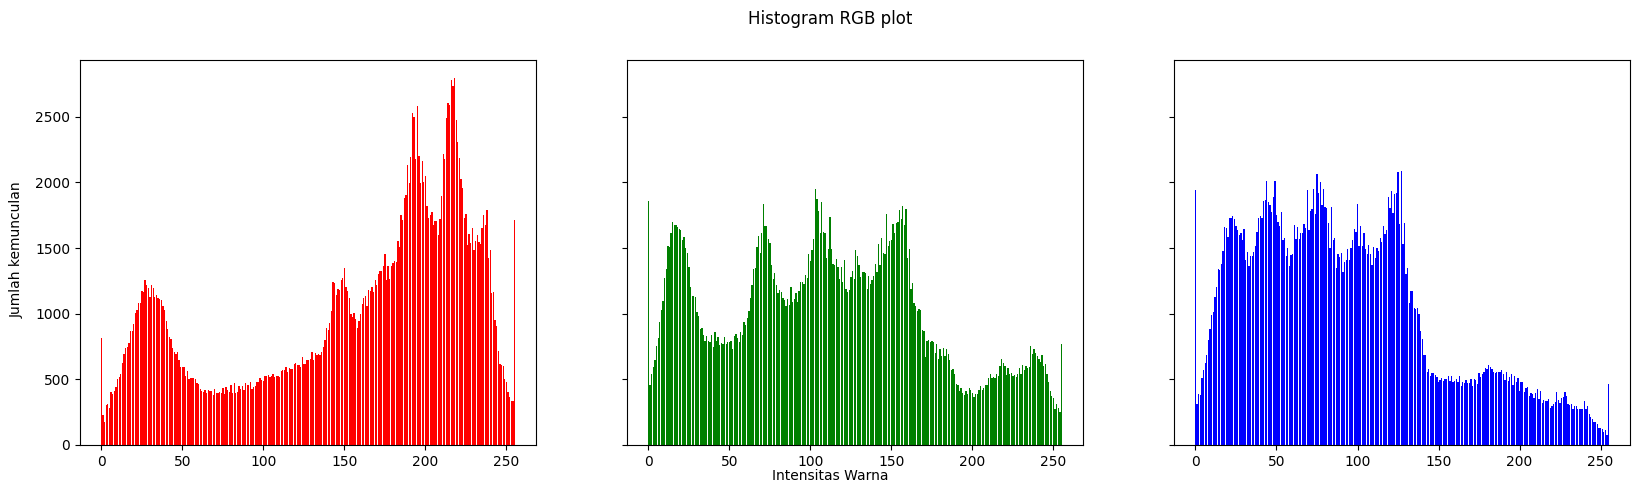

In [ ]:
# Membuat histogram image (manual)

img = cv.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week5/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)

red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0, height):
  for x in range(0, width):
    red[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    blue[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')
plt.show()

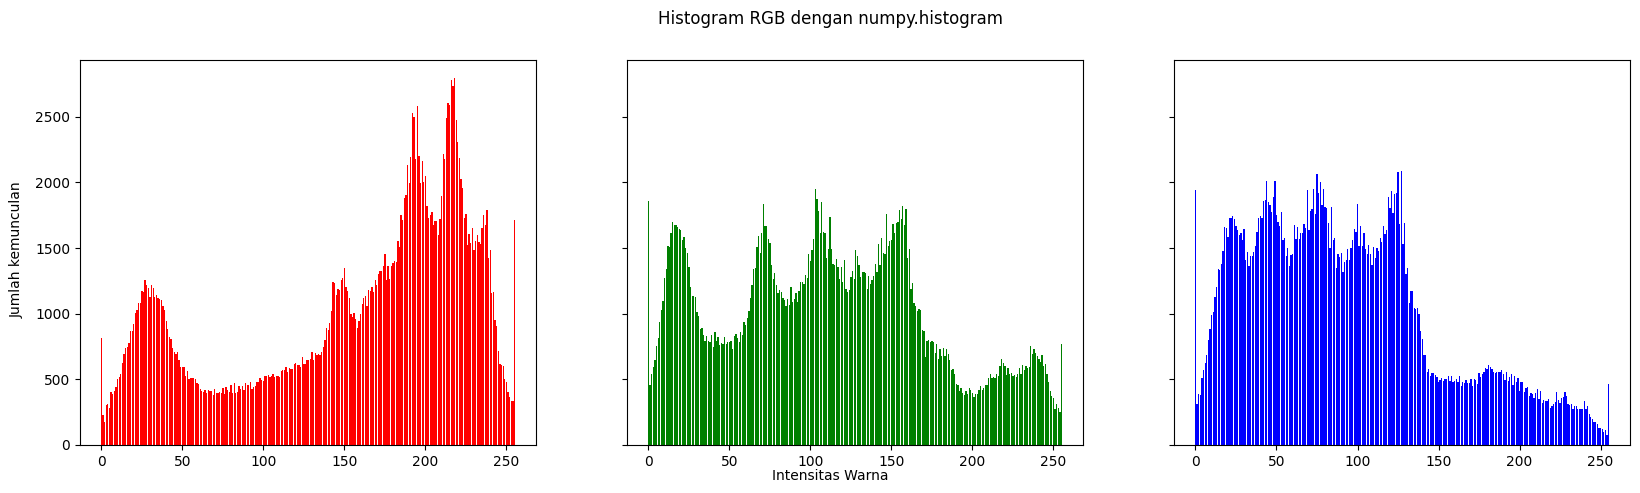

In [ ]:
# Membuat Histogram menggunakan library

img = cv.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week5/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Histogram dengan numpy
red_hist, _ = np.histogram(img[:,:,0], bins=256, range=(0,256))
green_hist, _ = np.histogram(img[:,:,1], bins=256, range=(0,256))
blue_hist, _ = np.histogram(img[:,:,2], bins=256, range=(0,256))

# Visualisasi
names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB dengan numpy.histogram')
fig.text(0.09, 0.5, 'Jumlah kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

axs[0].bar(names, red_hist, color='red')
axs[1].bar(names, green_hist, color='green')
axs[2].bar(names, blue_hist, color='blue')

plt.show()

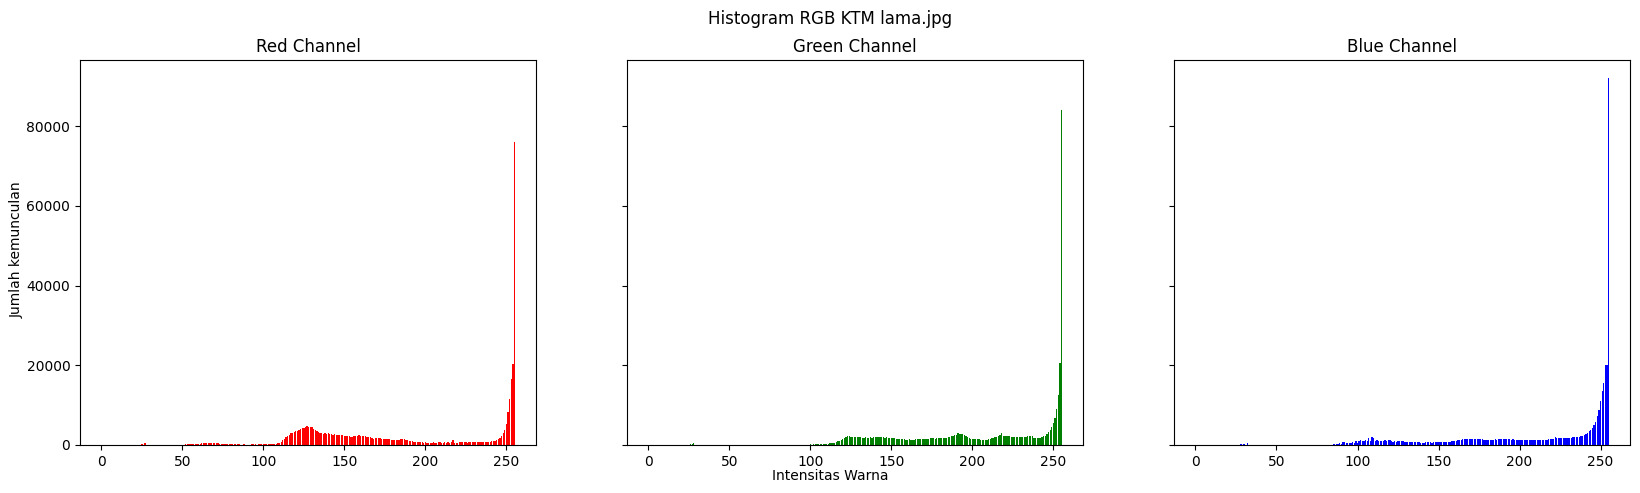

np.float64(204.467385)

In [ ]:
# Baca gambar
img = cv.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week5/KTM lama.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Histogram dengan numpy
red_hist, _ = np.histogram(img[:,:,0], bins=256, range=(0,256))
green_hist, _ = np.histogram(img[:,:,1], bins=256, range=(0,256))
blue_hist, _ = np.histogram(img[:,:,2], bins=256, range=(0,256))

# Visualisasi histogram RGB
names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB KTM lama.jpg')
fig.text(0.09, 0.5, 'Jumlah kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

axs[0].bar(names, red_hist, color='red')
axs[0].set_title("Red Channel")

axs[1].bar(names, green_hist, color='green')
axs[1].set_title("Green Channel")

axs[2].bar(names, blue_hist, color='blue')
axs[2].set_title("Blue Channel")

plt.show()

# Analisis distribusi
total_pixels = img.shape[0] * img.shape[1]
avg_intensity = (np.sum(names * red_hist) + np.sum(names * green_hist) + np.sum(names * blue_hist)) / (3*total_pixels)
avg_intensity

'''
Gambar KTM cenderung terang (bright) dengan kontras rendah, karena mayoritas
piksel berkumpul di intensitas tinggi.
'''

---


<p align="center">D2. Percobaan Histogram Equalization</p>


---



PSNR Lena (RGB asli vs equalized): 12.66 dB


/tmp/ipython-input-1854938194.py:31: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(r.ravel(), 256, [0,256], color='red', alpha=0.5, label='Red')
/tmp/ipython-input-1854938194.py:32: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(g.ravel(), 256, [0,256], color='green', alpha=0.5, label='Green')
/tmp/ipython-input-1854938194.py:33: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(b.ravel(), 256, [0,256], color='blue', alpha=0.5, label='Blue')
/tmp/ipython-input-1854938194.py:38: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter w

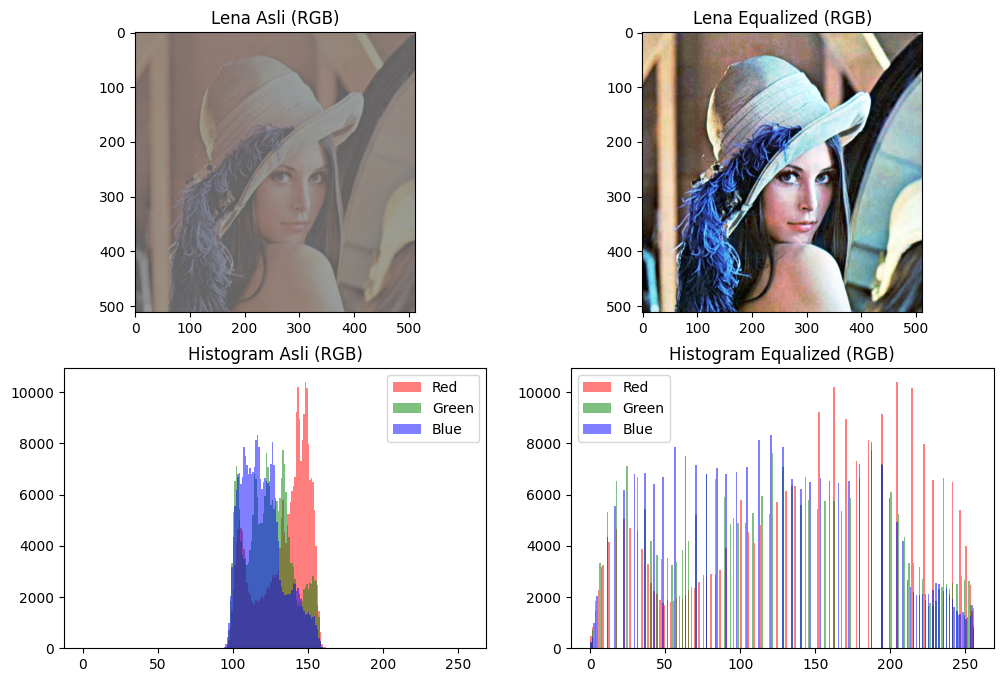

In [ ]:
lena = cv.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week5/lena_lc.jpg')
lena = cv.cvtColor(lena, cv.COLOR_BGR2RGB)  # konversi BGR ke RGB

# Pisahkan channel RGB
r, g, b = cv.split(lena)

# Histogram Equalization per channel
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)

# Gabungkan kembali
lena_eq = cv.merge((r_eq, g_eq, b_eq))

# Hitung MSE dan PSNR
mse = np.mean((lena.astype(np.float32) - lena_eq.astype(np.float32)) ** 2)
if mse == 0:
    psnr = 100
else:
    psnr = 20 * np.log10(255.0 / np.sqrt(mse))

# Cetak PSNR dengan format rapi
print(f"PSNR Lena (RGB asli vs equalized): {psnr:.2f} dB")

# Plot gambar dan histogram
plt.figure(figsize=(12,8))
plt.subplot(2,2,1), plt.imshow(lena), plt.title("Lena Asli (RGB)")
plt.subplot(2,2,2), plt.imshow(lena_eq), plt.title("Lena Equalized (RGB)")

plt.subplot(2,2,3)
plt.hist(r.ravel(), 256, [0,256], color='red', alpha=0.5, label='Red')
plt.hist(g.ravel(), 256, [0,256], color='green', alpha=0.5, label='Green')
plt.hist(b.ravel(), 256, [0,256], color='blue', alpha=0.5, label='Blue')
plt.title("Histogram Asli (RGB)")
plt.legend()

plt.subplot(2,2,4)
plt.hist(r_eq.ravel(), 256, [0,256], color='red', alpha=0.5, label='Red')
plt.hist(g_eq.ravel(), 256, [0,256], color='green', alpha=0.5, label='Green')
plt.hist(b_eq.ravel(), 256, [0,256], color='blue', alpha=0.5, label='Blue')
plt.title("Histogram Equalized (RGB)")
plt.legend()

plt.show()

PSNR Lena_lc (asli vs equalized): 9.91 dB


/tmp/ipython-input-2858660908.py:26: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(r.ravel(), 256, [0,256], color='red', alpha=0.5, label='Red')
/tmp/ipython-input-2858660908.py:27: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(g.ravel(), 256, [0,256], color='green', alpha=0.5, label='Green')
/tmp/ipython-input-2858660908.py:28: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(b.ravel(), 256, [0,256], color='blue', alpha=0.5, label='Blue')
/tmp/ipython-input-2858660908.py:33: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter w

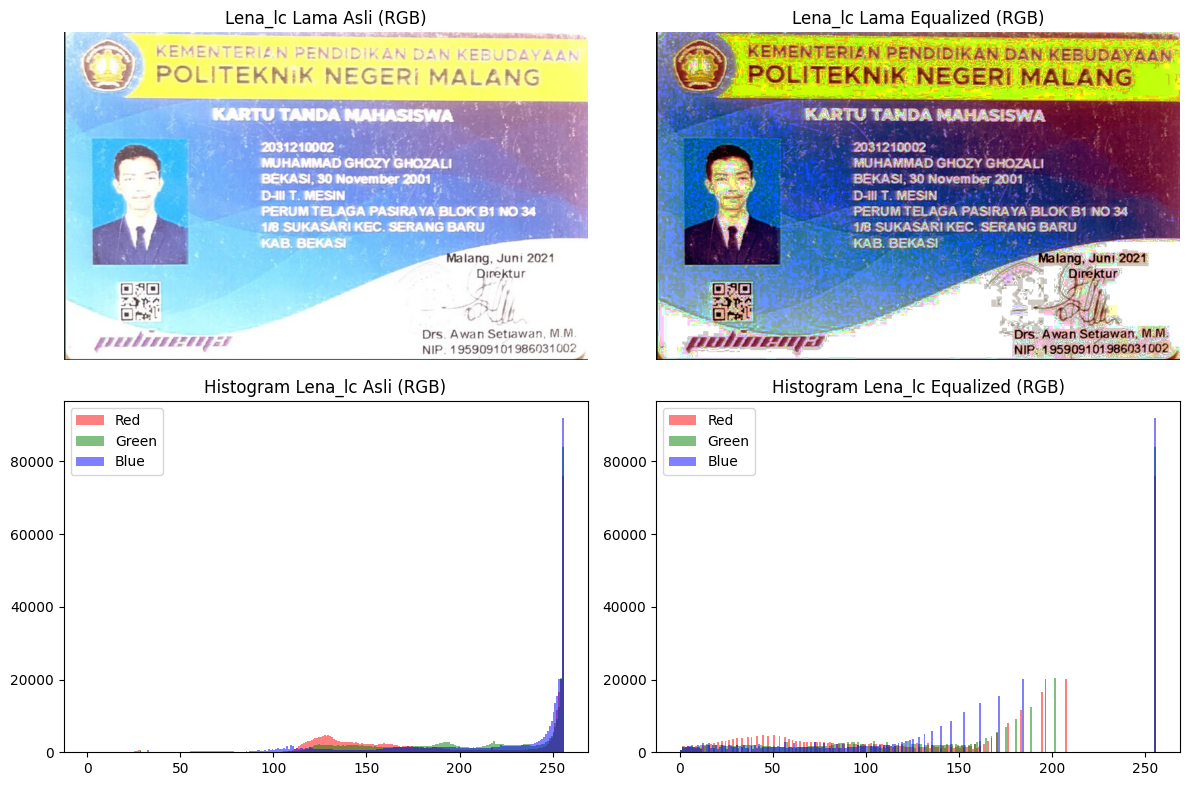

In [25]:
lena = cv.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week5/KTM lama.jpg')
lena = cv.cvtColor(lena, cv.COLOR_BGR2RGB)

r, g, b = cv.split(lena)

r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)

lena_eq = cv.merge((r_eq, g_eq, b_eq))

mse = np.mean((lena.astype(np.float32) - lena_eq.astype(np.float32)) ** 2)
if mse == 0:
    psnr = 100
else:
    psnr = 20 * np.log10(255.0 / np.sqrt(mse))
print(f"PSNR Lena_lc (asli vs equalized): {psnr:.2f} dB")

plt.figure(figsize=(12,8))
plt.subplot(2,2,1), plt.imshow(lena), plt.title("Lena_lc Lama Asli (RGB)")
plt.axis("off")
plt.subplot(2,2,2), plt.imshow(lena_eq), plt.title("Lena_lc Lama Equalized (RGB)")
plt.axis("off")

plt.subplot(2,2,3)
plt.hist(r.ravel(), 256, [0,256], color='red', alpha=0.5, label='Red')
plt.hist(g.ravel(), 256, [0,256], color='green', alpha=0.5, label='Green')
plt.hist(b.ravel(), 256, [0,256], color='blue', alpha=0.5, label='Blue')
plt.title("Histogram Lena_lc Asli (RGB)")
plt.legend()

plt.subplot(2,2,4)
plt.hist(r_eq.ravel(), 256, [0,256], color='red', alpha=0.5, label='Red')
plt.hist(g_eq.ravel(), 256, [0,256], color='green', alpha=0.5, label='Green')
plt.hist(b_eq.ravel(), 256, [0,256], color='blue', alpha=0.5, label='Blue')
plt.title("Histogram Lena_lc Equalized (RGB)")
plt.legend()

plt.tight_layout()
plt.show()


---


<p align="center">D3. Tugas Praktikum Dithering</p>


---



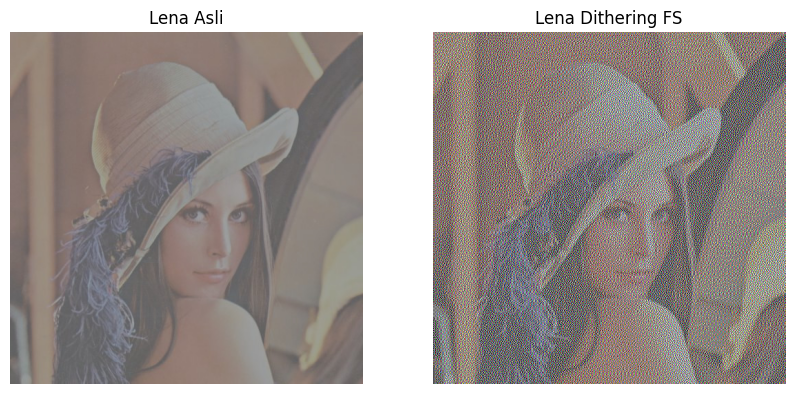

In [24]:
def threshold(value):
    return 255 if value > 127 else 0

def floyd_steinberg_dither(img):
    h, w, c = img.shape
    img = img.astype(float)

    for y in range(h):
        for x in range(w):
            old_pixel = img[y, x].copy()
            new_pixel = np.array([threshold(old_pixel[0]),
                                  threshold(old_pixel[1]),
                                  threshold(old_pixel[2])])
            img[y, x] = new_pixel
            error = old_pixel - new_pixel

            if x+1 < w:
                img[y, x+1] += error * 7/16
            if y+1 < h and x > 0:
                img[y+1, x-1] += error * 3/16
            if y+1 < h:
                img[y+1, x] += error * 5/16
            if y+1 < h and x+1 < w:
                img[y+1, x+1] += error * 1/16

    return np.clip(img, 0, 255).astype(np.uint8)

lena = cv.imread("/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week5/lena_lc.jpg")
lena_rgb = cv.cvtColor(lena, cv.COLOR_BGR2RGB)

lena_dither = floyd_steinberg_dither(lena_rgb)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(lena_rgb), plt.title("Lena Asli"), plt.axis("off")
plt.subplot(1,2,2), plt.imshow(lena_dither), plt.title("Lena Dithering FS"), plt.axis("off")
plt.show()


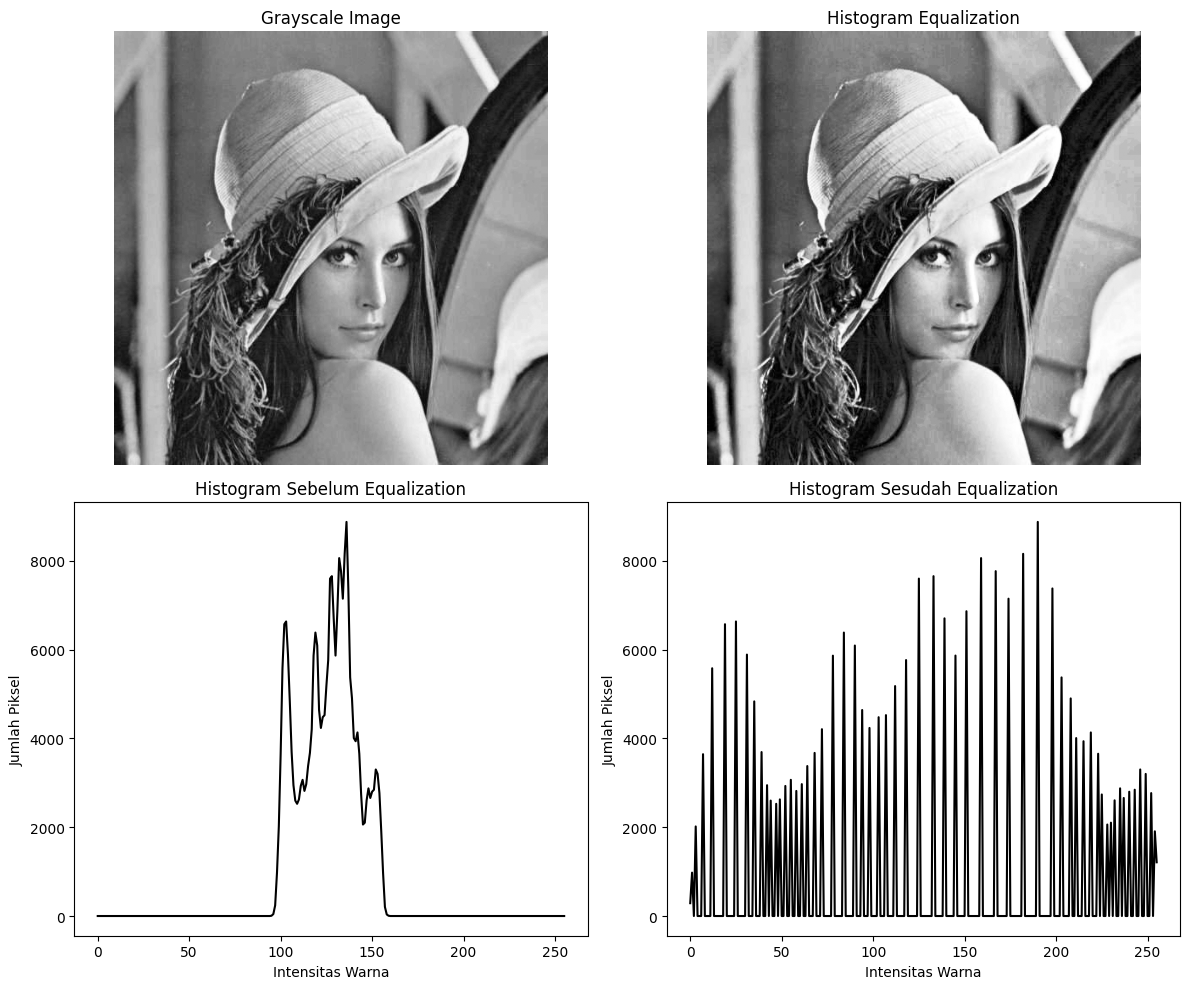

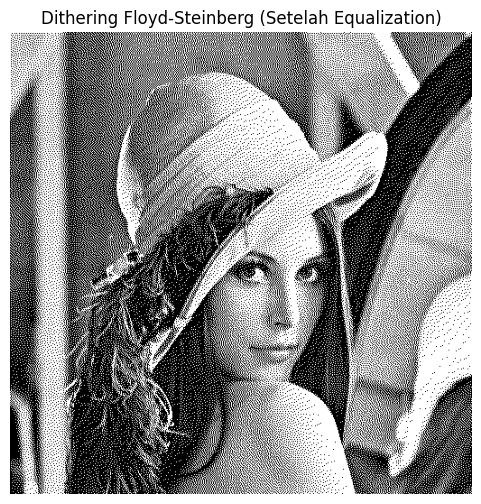

In [ ]:
def threshold(value):
    return 255 if value > 127 else 0

def floyd_steinberg_dither_gray(img):
    h, w = img.shape
    img = img.astype(float)

    for y in range(h):
        for x in range(w):
            old_pixel = img[y, x]
            new_pixel = threshold(old_pixel)
            img[y, x] = new_pixel
            error = old_pixel - new_pixel

            if x+1 < w:
                img[y, x+1] += error * 7/16
            if y+1 < h and x > 0:
                img[y+1, x-1] += error * 3/16
            if y+1 < h:
                img[y+1, x] += error * 5/16
            if y+1 < h and x+1 < w:
                img[y+1, x+1] += error * 1/16

    return np.clip(img, 0, 255).astype(np.uint8)

lena_lc = cv.imread("/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week5/lena_lc.jpg", cv.IMREAD_GRAYSCALE)

hist_before, bins = np.histogram(lena_lc.flatten(), 256, [0,256])

lena_eq = cv.equalizeHist(lena_lc)

hist_after, bins = np.histogram(lena_eq.flatten(), 256, [0,256])

lena_dither = floyd_steinberg_dither_gray(lena_eq)

plt.figure(figsize=(12,10))

plt.subplot(2,2,1), plt.imshow(lena_lc, cmap="gray")
plt.title("Grayscale Image"), plt.axis("off")

plt.subplot(2,2,2), plt.imshow(lena_eq, cmap="gray")
plt.title("Histogram Equalization"), plt.axis("off")

plt.subplot(2,2,3), plt.plot(hist_before, color='black')
plt.title("Histogram Sebelum Equalization")
plt.xlabel("Intensitas Warna"), plt.ylabel("Jumlah Piksel")

plt.subplot(2,2,4), plt.plot(hist_after, color='black')
plt.title("Histogram Sesudah Equalization")
plt.xlabel("Intensitas Warna"), plt.ylabel("Jumlah Piksel")

plt.tight_layout()
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(lena_dither, cmap="gray")
plt.title("Dithering Floyd-Steinberg (Setelah Equalization)")
plt.axis("off")
plt.show()
